# Layer freeze & unfreeze = 84
# batch_size = 32
# epoch = 200
# จำนวน node ในแต่ละ dense layer = 512, 512, 256

In [1]:
!pip install opencv-python  protobuf==3.20.*  keras scikeras tqdm google-auth==2.6.0 google-auth-oauthlib==0.4.6 google-pasta==0.2.0

  Using cached google_auth-2.6.0-py2.py3-none-any.whl (156 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.23.3
    Uninstalling google-auth-2.23.3:
      Successfully uninstalled google-auth-2.23.3
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.0.0
    Uninstalling google-auth-oauthlib-1.0.0:
      Successfully uninstalled google-auth-oauthlib-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.13.0 requires google-auth-oauthlib<1.1,>=0.5, but you have google-auth-oauthlib 0.4.6 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
!pip install tensorflow==2.13.1

  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.23.3-py2.py3-none-any.whl (182 kB)
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.6.0
    Uninstalling google-auth-2.6.0:
      Successfully uninstalled google-auth-2.6.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
pip freeze

absl-py==2.0.0
anyio==3.7.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.2.1
astunparse==1.6.3
attrs==23.1.0
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
cachetools==5.3.1
certifi==2023.7.22
cffi==1.15.1
chardet==3.0.4
clang==5.0
comm==0.1.3
contourpy==1.1.0
cycler==0.11.0
dbus-python==1.2.16
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.2
executing==1.2.0
fastjsonschema==2.17.1
flatbuffers==23.5.26
fonttools==4.40.0
fqdn==1.5.1
gast==0.4.0
google-auth==2.23.3
google-auth-oauthlib==1.0.0
google-images-download==2.8.0
google-pasta==0.2.0
grpcio==1.56.0
h11==0.14.0
h5py==3.1.0
icrawler==0.6.7
idna==2.8
importlib-metadata==6.7.0
importlib-resources==5.12.0
ipykernel==6.24.0
ipython==8.12.2
ipython-genutils==0.2.0
ipywidgets==8.0.7
isoduration==20.11.0
jax==0.4.13
jedi==0.18.2
Jinja2==3.1.2
joblib==1.3.2
jsonpointer==2.4
jsonschema==4.18.0
jsonschema-specifications==2023.6.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==

In [4]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers.legacy import Adam
# tf.keras.optimizers.legacy
from sklearn.metrics import confusion_matrix, classification_report

2023-10-14 13:27:01.184718: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.6) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


# 6.1 load base model and add new layers

In [6]:
#Load base model
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224, 224, 3))

# Add new layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling
x = Dense(512, activation='relu')(x)  # Layer 1 with 1024 nodes and ReLU activation
x = Dense(512, activation='relu')(x)  # Layer 2 with 1024 nodes and ReLU activation
x = Dense(256, activation='relu')(x)   # Layer 3 with 512 nodes and ReLU activation

# Final prediction layer
preds = Dense(3, activation='softmax')(x)  # Layer 4 with 3 nodes (3 classes) and softmax activation

model=Model(inputs=base_model.input,outputs=preds)
model.summary()

for layer in model.layers[:84]:
    layer.trainable=False
for layer in model.layers[84:]:
    layer.trainable=True

2023-10-14 13:27:03.365226: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-14 13:27:03.372534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-14 13:27:03.372735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [7]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 conv1
2 conv1_bn
3 conv1_relu
4 conv_dw_1
5 conv_dw_1_bn
6 conv_dw_1_relu
7 conv_pw_1
8 conv_pw_1_bn
9 conv_pw_1_relu
10 conv_pad_2
11 conv_dw_2
12 conv_dw_2_bn
13 conv_dw_2_relu
14 conv_pw_2
15 conv_pw_2_bn
16 conv_pw_2_relu
17 conv_dw_3
18 conv_dw_3_bn
19 conv_dw_3_relu
20 conv_pw_3
21 conv_pw_3_bn
22 conv_pw_3_relu
23 conv_pad_4
24 conv_dw_4
25 conv_dw_4_bn
26 conv_dw_4_relu
27 conv_pw_4
28 conv_pw_4_bn
29 conv_pw_4_relu
30 conv_dw_5
31 conv_dw_5_bn
32 conv_dw_5_relu
33 conv_pw_5
34 conv_pw_5_bn
35 conv_pw_5_relu
36 conv_pad_6
37 conv_dw_6
38 conv_dw_6_bn
39 conv_dw_6_relu
40 conv_pw_6
41 conv_pw_6_bn
42 conv_pw_6_relu
43 conv_dw_7
44 conv_dw_7_bn
45 conv_dw_7_relu
46 conv_pw_7
47 conv_pw_7_bn
48 conv_pw_7_relu
49 conv_dw_8
50 conv_dw_8_bn
51 conv_dw_8_relu
52 conv_pw_8
53 conv_pw_8_bn
54 conv_pw_8_relu
55 conv_dw_9
56 conv_dw_9_bn
57 conv_dw_9_relu
58 conv_pw_9
59 conv_pw_9_bn
60 conv_pw_9_relu
61 conv_dw_10
62 conv_dw_10_bn
63 conv_dw_10_relu
64 conv_pw_10
65 conv_pw_1

# 6.2 model training and validation

#### Create data generator object

In [8]:
# Define your data augmentation parameters
rotation_range = 30
zoom_range = 0.2
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
horizontal_flip = True
batch_size = 32
seed_value = 42

# Create DataGenerator Object
datagen = ImageDataGenerator(
    rotation_range=rotation_range,
    zoom_range=zoom_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    shear_range=shear_range,
    horizontal_flip=horizontal_flip,
    preprocessing_function=preprocess_input,
    fill_mode="nearest"
)

#### Create train image generator

Found 97 images belonging to 3 classes.


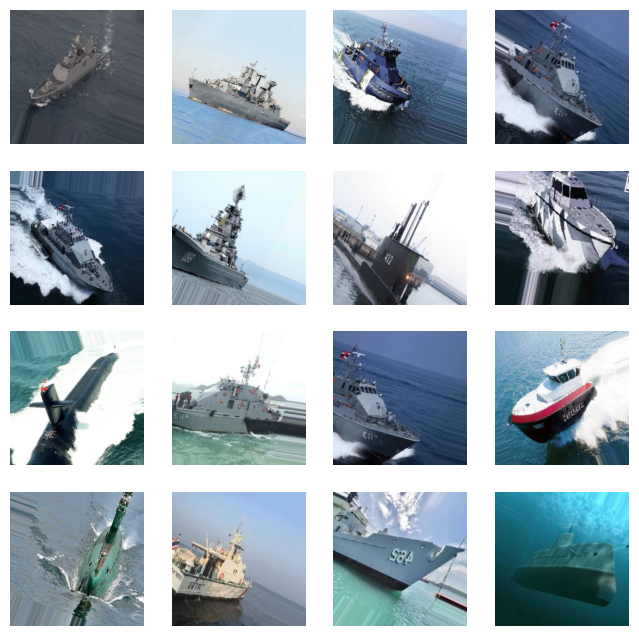

In [9]:
train_data_directory = './Ship/Train/'

# Create Train Image Generator
train_generator = datagen.flow_from_directory(
    train_data_directory,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed_value,
    shuffle=True
)


fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        batch = train_generator.next()
        Img_train = (batch[0][0] + 1) / 2.0
        axes[i, j].imshow(Img_train)
        axes[i, j].axis('off')
plt.show()

Found 69 images belonging to 3 classes.


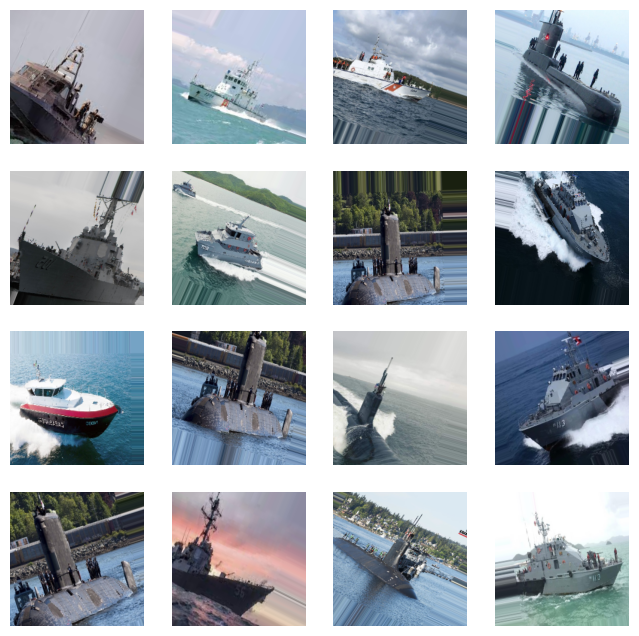

In [10]:
# Specify the path to the validation data directory
validate_data_directory = './Ship/Validate/'

# Create Validation Image Generator
val_generator = datagen.flow_from_directory(
    validate_data_directory,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    seed=seed_value,
    shuffle=True
)


fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        batch = val_generator.next()
        Img_val = (batch[0][0] + 1) / 2.0
        axes[i, j].imshow(Img_val)
        axes[i, j].axis('off')
plt.show()

In [11]:
# Create Optimizier
opts = Adam(learning_rate=0.0001, use_ema=True)
model.compile(loss='categorical_crossentropy', optimizer=opts, metrics=['accuracy'])

# Define training Generator Parameters
EP = 200

step_size_train = train_generator.n // train_generator.batch_size
step_size_val = val_generator.n // val_generator.batch_size


# Check step_sizes_train = step_sizes_val
if step_size_train != step_size_val:    
    train_generator.batch_size = val_generator.batch_size
    step_size_train = train_generator.n // train_generator.batch_size

In [12]:
# Train the model and store the training history
history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=step_size_train,
    validation_data=val_generator,
    validation_steps=step_size_val,
    epochs=EP,
    verbose=1
)

/tmp/ipykernel_411968/1294660157.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/200


2023-10-14 13:27:18.498191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-14 13:27:19.626056: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1a084960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-14 13:27:19.626090: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2023-10-14 13:27:19.630699: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-14 13:27:19.752773: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3/3 [==============================] - 7s 975ms/step - loss: 1.2185 - accuracy: 0.3646 - val_loss: 1.0563 - val_accuracy: 0.3750
Epoch 2/200
3/3 [==============================] - 2s 670ms/step - loss: 0.9511 - accuracy: 0.5231 - val_loss: 1.0578 - val_accuracy: 0.5156
Epoch 3/200
3/3 [==============================] - 2s 924ms/step - loss: 0.9177 - accuracy: 0.5231 - val_loss: 1.0100 - val_accuracy: 0.5000
Epoch 4/200
3/3 [==============================] - 2s 849ms/step - loss: 0.9025 - accuracy: 0.5208 - val_loss: 0.8984 - val_accuracy: 0.7188
Epoch 5/200
3/3 [==============================] - 2s 666ms/step - loss: 0.8381 - accuracy: 0.6769 - val_loss: 0.8640 - val_accuracy: 0.4688
Epoch 6/200
3/3 [==============================] - 2s 888ms/step - loss: 0.6901 - accuracy: 0.8462 - val_loss: 0.6861 - val_accuracy: 0.8281
Epoch 7/200
3/3 [==============================] - 2s 656ms/step - loss: 0.7505 - accuracy: 0.6615 - val_loss: 0.7057 - val_accuracy: 0.7344
Epoch 8/200
3/3 [========

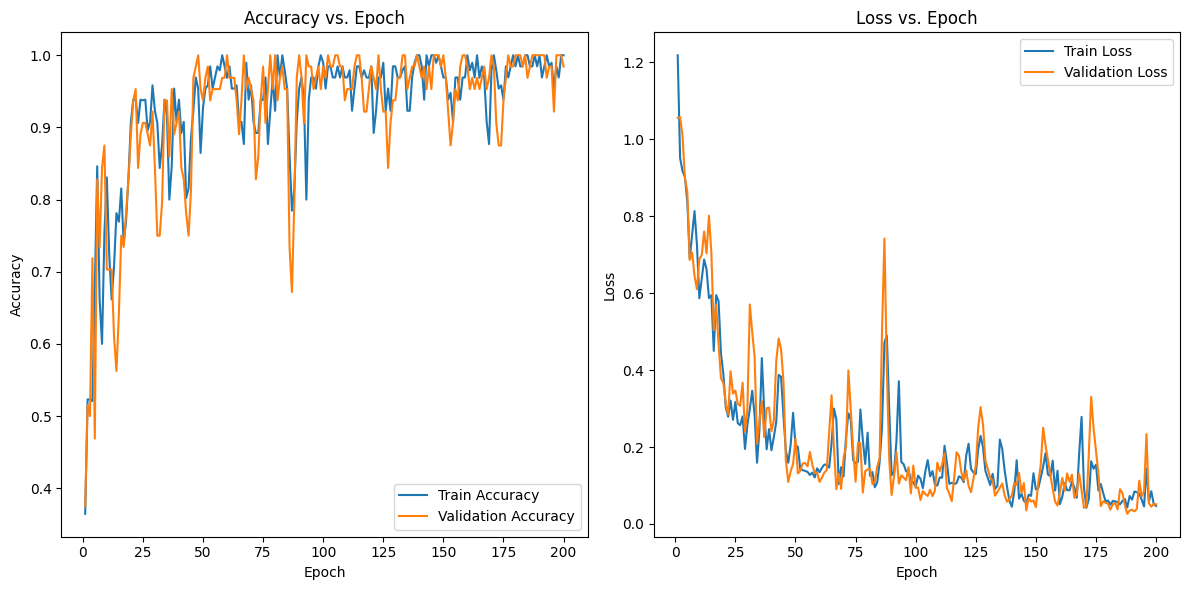

In [17]:
# Extract the training history
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Create a list of epochs for plotting
N = range(1, EP + 1)

# Performance Visualization
import matplotlib.pyplot as plt

# View Accuracy (Training, Validation)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(N, train_accuracy, label="Train Accuracy")
plt.plot(N, val_accuracy, label="Validation Accuracy")
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# View Loss (Training, Validation)
plt.subplot(1, 2, 2)
plt.plot(N, train_loss, label="Train Loss")
plt.plot(N, val_loss, label="Validation Loss")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# 6.3 Create ImageDataGenerator (Test) and Predicts Result

In [18]:
#Initial test generator
test_generator = datagen.flow_from_directory(
    './Ship/Test/',
    class_mode="categorical",
    target_size=(224, 224),
    color_mode="rgb",
    shuffle=False,
    batch_size=32
)

#Get class id for y_real_class
y_true = test_generator.classes

#predict images according to test_generator
preds = model.predict_generator(test_generator)
print(preds.shape)
print(preds)

Found 15 images belonging to 3 classes.


/tmp/ipykernel_411968/1938044545.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_generator)


(15, 3)
[[9.7997713e-01 1.7463243e-02 2.5597140e-03]
 [9.1295552e-01 7.2345011e-02 1.4699414e-02]
 [3.3310083e-01 6.1611259e-01 5.0786637e-02]
 [7.3113841e-01 1.2128801e-01 1.4757359e-01]
 [4.4488248e-01 5.2613014e-01 2.8987385e-02]
 [7.3482506e-03 9.7567618e-01 1.6975595e-02]
 [1.1061934e-01 6.8671143e-01 2.0266923e-01]
 [8.3125466e-01 1.5354843e-01 1.5196984e-02]
 [1.9127539e-03 9.9098128e-01 7.1059903e-03]
 [5.4765541e-02 9.1590208e-01 2.9332394e-02]
 [3.1301407e-03 2.1075382e-04 9.9665916e-01]
 [2.5472942e-01 4.1731421e-02 7.0353913e-01]
 [3.3258796e-02 4.6140116e-02 9.2060107e-01]
 [2.8379163e-01 1.5953336e-02 7.0025504e-01]
 [4.9827648e-03 4.3457363e-02 9.5155984e-01]]


In [19]:
y_pred = np.argmax(preds,axis=1)
print(test_generator.classes)
print(y_pred)

[0 0 0 0 1 1 1 1 1 1 2 2 2 2 2]
[0 0 1 0 1 1 1 0 1 1 2 2 2 2 2]


In [20]:
#Calculate confusion matrix, classification report between y_true and df_class
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[3 1 0]
 [1 5 0]
 [0 0 5]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.83      0.83      0.83         6
           2       1.00      1.00      1.00         5

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15

